In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['75'][1]
models = []
scalers = []
all_dummies = []

In [2]:
len(route)

88

## With neural networks

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['75'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    df = df[df['traveltime']<df['traveltime'].quantile(0.95)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 4342 to 4348


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 4342 to 4348
min pred: 66.63257507992768
mean pred: 93.33292582755347
max pred: 107.62479366290249
Mape: 51.92537824685927
r2: 0.002107255070874614
mae: 23.08055441476355 


Building for 4348 to 4646
model for: 4348 to 4646
min pred: 74.55202607662184
mean pred: 119.96245078713568
max pred: 140.50809809669536
Mape: 19.2248472102603
r2: 0.19096888276853885
mae: 21.88471373533632 


Building for 4646 to 4647
model for: 4646 to 4647
min pred: 27.977581891794465
mean pred: 40.543209861141705
max pred: 45.657980352674294
Mape: 27.994136504080934
r2: 0.08620960346155693
mae: 9.374873969575402 


Building for 4647 to 4435
model for: 4647 to 4435
min pred: 87.29604362768119
mean pred: 118.12336572343952
max pred: 133.96700011934936
Mape: 12.810738611972745
r2: 0.24741098623157454
mae: 15.161597138271825 


Building for 4435 to 2605
model for: 4435 to 2605
min pred: 146.012036915637
mean pred: 196.45987473983823
max pred: 232.5418067995705
Mape: 20.368074892113402
r2: 0.1081542142467

model for: 2861 to 2862
min pred: 41.7161951180369
mean pred: 51.24602047999655
max pred: 56.56815303197915
Mape: 17.403212666409203
r2: 0.051749985235379214
mae: 8.23243337087704 


Building for 2862 to 2863
model for: 2862 to 2863
min pred: 3.9618741492017087
mean pred: 7.478482196861154
max pred: 10.121389759551459
Mape: 129.03130996832303
r2: 0.006741563705271569
mae: 6.222803242476945 


Building for 2863 to 2864
model for: 2863 to 2864
min pred: 26.03888541234843
mean pred: 29.688256684305685
max pred: 33.12527271778801
Mape: 17.608600829461032
r2: 0.01116168075390489
mae: 5.389268769681929 


Building for 2864 to 4486
model for: 2864 to 4486
min pred: 38.79790630128627
mean pred: 44.44424694430103
max pred: 47.49674271469128
Mape: 14.310582366111179
r2: 0.02876868787519682
mae: 6.741822140731276 


Building for 4486 to 4586
model for: 4486 to 4586
min pred: 72.62078076242574
mean pred: 118.10503403891903
max pred: 148.11501713941522
Mape: 26.338780745867837
r2: 0.125540202111662

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 3181 to 447
min pred: 25.003257724024834
mean pred: 149.16424307300298
max pred: 193.5558059162283
Mape: 30.199823741713274
r2: 0.17763300531044712
mae: 43.4102874724887 


Building for 447 to 5045
model for: 447 to 5045
min pred: 36.21109196556499
mean pred: 47.980459465609755
max pred: 54.24867247839101
Mape: 26.71432446249135
r2: 0.07847957510076309
mae: 11.153875146571243 


Building for 5045 to 4460
model for: 5045 to 4460
min pred: 36.867255628781905
mean pred: 51.08063585064459
max pred: 57.10283468385173
Mape: 26.40046938755243
r2: 0.055639585737154995
mae: 12.44825217976856 


Building for 4460 to 453
model for: 4460 to 453
min pred: 21.38557650089927
mean pred: 36.02544053282043
max pred: 47.37222512333796
Mape: 74.30968930730066
r2: 0.023433515282009987
mae: 16.885587686589076 


Building for 453 to 4477
model for: 453 to 4477
min pred: 48.58045135492838
mean pred: 54.25704636403629
max pred: 61.78077888950884
Mape: 58.17686222160181
r2: -0.007937319877063143
mae:

In [3]:
def get_merged(stop):
    route = routes['75'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [4]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [5]:
MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,86):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
294.4346008300781


In [6]:
sum(MAPES)/len(MAPES)

23.095880540774385

In [7]:
min(MAPES)

10.354436633137409

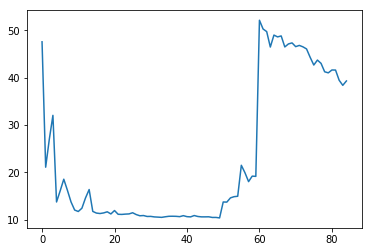

In [10]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

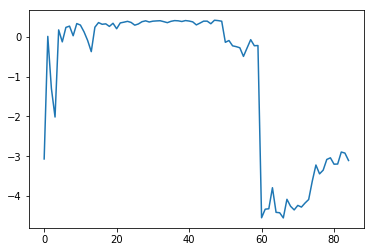

In [9]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


-0.5894347329251236

In [13]:
max(r2s)

0.5167369239106632

In [17]:
r2s

[-2.3243963800559464,
 -5.122852718987301,
 -1.466225453086044,
 -0.9765732214368865,
 0.04131244740870532,
 -0.05741087802918754,
 -0.21335463841355584,
 -0.044777395479644655,
 0.020514438062677054,
 0.14775545095191123,
 -0.09843726146392595,
 0.0903747652054614,
 0.28604008081344,
 0.20765217756066245,
 0.2723283514588516,
 0.22319049829180637,
 0.2451910419534553,
 0.21236341277763426,
 0.30161277569223943,
 0.3465129756070603,
 0.35254771477960267,
 0.27478340419172265,
 0.2625933693915301,
 0.3497972083635482,
 0.3397104819858573,
 0.3469183890249389,
 0.36170864252864066,
 0.3260883969942254,
 0.40574149757735134,
 0.3272323686015437,
 -0.1736892263550447,
 -0.39244511728335274,
 0.06570195164843029,
 0.2441273048369964,
 0.25790235342469836,
 0.24597415275739953,
 0.2509308891626172,
 0.34613515806401063,
 0.3695159604058712,
 0.38139908855394056,
 0.3796616107914146,
 0.36876404375336835,
 0.36139120455344076,
 0.37522733502024297,
 0.38243218382087707,
 0.40324094695441537,


In [15]:
max(r2s)

0.47391227923156953

In [ ]:
import pickle
with open('/data/chainedneuralmodels.bin','wb') as handle:
    d= {'models':models,\
       'x-scalers':scalers,\
        'y-scalers':y_scalers}
    pickle.dump(d,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(models)

69

A reason not to use these is that these sixty models and scalers pickle to about 6 megabytes. We would need roughly 500-600 megabytes of models in memory then, just to run our time table predictions quickly. Though it is possible we could just load and delete them as needed, the linear models are miniscule in comparison.

They also take much longer to predict than the linear models, (but only slightly), and some still give negative predictions.

Also, an instance can be seen of r2 score sharply plunging at the end of the route. Though I think this is also true for the linear models. The trouble is that, since the training time is so greatly increased, it will be harder to avoid this. Harder than with the liner models anyway.

The r2 scores are significantly better, but the MAPE isn't. The r2 matters to us as data scientists, but it would seem like a) MAPE and b) actually having a working app would be of more concern to the user.






The Mean MAPE was about 13% for the linear models. They're also much faster.